## Creating a data science ready agent with LangChain!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI

In [6]:
llm = ChatOpenAI(model_name='gpt-4', temperature=0, verbose=True)

/Users/ozerozdal/anaconda3/envs/llm_chains/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [7]:
agent = create_pandas_dataframe_agent(llm, iris, verbose=True)

In [19]:
agent.run("What is the aveage sepal_length?")



> Entering new AgentExecutor chain...
Thought: To find the average of a column in a pandas dataframe, we can use the `mean()` function on that specific column.
Action: python_repl_ast
Action Input: df['sepal_length'].mean()5.843333333333334I now know the final answer
Final Answer: The average sepal_length is approximately 5.84.

> Finished chain.


'The average sepal_length is approximately 5.84.'

In [11]:
iris['sepal_length'].mean()

5.843333333333334

In [20]:
agent.run("What is the max sepal width for setosa?")



> Entering new AgentExecutor chain...
Thought: To find the maximum sepal width for the species 'setosa', I need to filter the dataframe for rows where the species is 'setosa', then select the 'sepal_width' column and apply the max function.
Action: python_repl_ast
Action Input: df[df['species'] == 'setosa']['sepal_width'].max()4.4I now know the maximum sepal width for the species 'setosa'.
Final Answer: The maximum sepal width for setosa is 4.4.

> Finished chain.


'The maximum sepal width for setosa is 4.4.'

In [17]:
iris[iris['species'] == 'setosa']['sepal_width'].max()

4.4



> Entering new AgentExecutor chain...
Thought: To create the plots, I will need to import matplotlib. I will also need to decide what kind of plots to create. Given the data, it might be interesting to create a histogram for each of the numerical columns to see the distribution of values. I will also need to create a subplot for each graph.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot for sepal_length
axs[0, 0].hist(df['sepal_length'], bins=10, color='blue', alpha=0.7)
axs[0, 0].set_title('Sepal Length')

# Plot for sepal_width
axs[0, 1].hist(df['sepal_width'], bins=10, color='red', alpha=0.7)
axs[0, 1].set_title('Sepal Width')

# Plot for petal_length
axs[1, 0].hist(df['petal_length'], bins=10, color='green', alpha=0.7)
axs[1, 0].set_title('Petal Length')

# Plot for petal_width
axs[1, 1].hist(df['petal_width'], bins=10, color='purple', alpha=0.7)
axs[1, 1].set_title('Petal Width')

plt.tigh

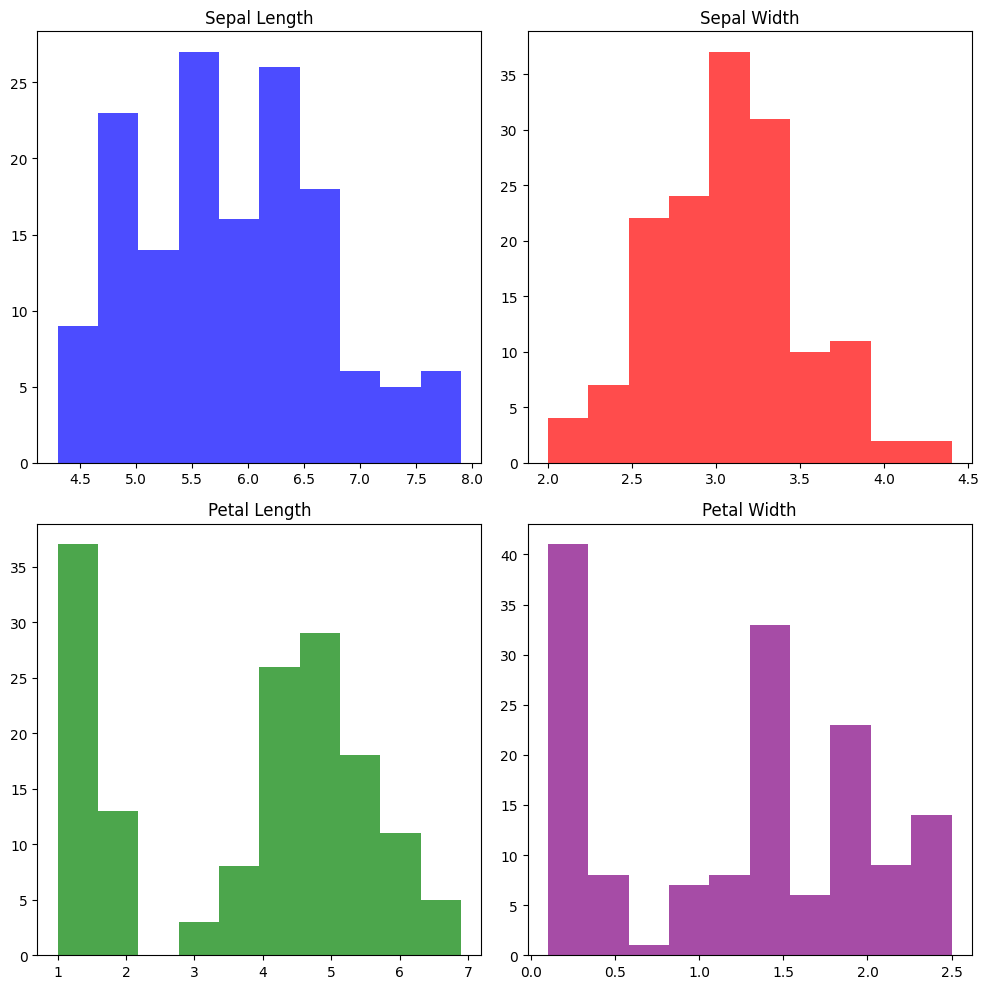

The code above should generate four histograms in a 2x2 grid, each representing the distribution of values in the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns respectively. The histograms should be colored differently for better distinction. The 'tight_layout' function is used to ensure that the subplots do not overlap. The 'show' function is used to display the plots. 
Final Answer: The code above generates four histograms in a 2x2 grid, each representing the distribution of values in the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns respectively. The histograms are colored differently for better distinction. The 'tight_layout' function is used to ensure that the subplots do not overlap. The 'show' function is used to display the plots.

> Finished chain.


"The code above generates four histograms in a 2x2 grid, each representing the distribution of values in the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns respectively. The histograms are colored differently for better distinction. The 'tight_layout' function is used to ensure that the subplots do not overlap. The 'show' function is used to display the plots."

In [7]:
agent.run("""Do some analysis with at least 3 plots, use a subplot for each graph so thay can be shown at the same time, 
        use matplotlib for the graphs.""")

In [8]:
agent.run("""Train a RandomForest Classifier to predict species using the most important features.
          Show me the what variables are the most influential to this model""")

/Users/ozerozdal/anaconda3/envs/llm_chains/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To train a RandomForest Classifier, I first need to import the necessary libraries and split the data into features and target variables. Then, I can train the model and find the most important features.

Action: python_repl_ast
Action Input: 
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
importances
```[0.10809762 0.03038681 0.43999397 0.42152159]The output shows the importance of each feature in the model. The values represent t

"The most influential variables to the RandomForest Classifier model are 'petal_length' and 'petal_width'."

In [9]:
agent.run("""Could you utilize this machine learning model to determine the species associated with a sample characterized by 
          the following measurements: sepal length of 4.6, sepal width of 3.1, petal length of 1.5, 
          and petal width of 0.2?""")



> Entering new AgentExecutor chain...
Thought: The question is asking to predict the species of a sample given its measurements. However, there is no machine learning model provided. We can only make a guess based on the data we have. We can check if there are any samples in the dataset with the same measurements and see what species they belong to.

Action: python_repl_ast
Action Input: df[(df['sepal_length'] == 4.6) & (df['sepal_width'] == 3.1) & (df['petal_length'] == 1.5) & (df['petal_width'] == 0.2)]   sepal_length  sepal_width  petal_length  petal_width species
3           4.6          3.1           1.5          0.2  setosaThere is a sample in the dataset with the same measurements and it belongs to the species 'setosa'. Therefore, we can guess that a sample with these measurements would also belong to the 'setosa' species. However, this is not a definitive answer and a machine learning model would be needed to make accurate predictions.
Final Answer: Based on the data we have,

"Based on the data we have, a sample with a sepal length of 4.6, sepal width of 3.1, petal length of 1.5, and petal width of 0.2 is likely to belong to the 'setosa' species. However, a machine learning model would be needed to make accurate predictions."

In [11]:
iris[(iris['sepal_length'] == 4.6) & (iris['sepal_width'] == 3.1) & (iris['petal_length'] == 1.5) & (iris['petal_width'] == 0.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
